In [1]:
from BBBacktesterModule import *
spread = 1.4
pips = 0.0001

## Define a tester object

In [2]:
tester = BBBacktester("AUD_CHF_2016_2021.csv", "c", "2016-01-01", "2019-12-31", spread*pips/2) 
        #mult by 2 for a 'round trip', multiply by pips
    

## Optimize parameters and plot best strategy backtest

SIMPLE CONTRARIAN STRATEGY | INSTRUMENT = c | FREQ = 45 | SMA = 90 | DEV = 1.777777
----------------------------------------------------------------------------------------------------


PERFORMANCE MEASURES:


Multiple (Strategy):         9.923030
Multiple (Buy-and-Hold):     0.974916
--------------------------------------
Out-/Underperformance:       8.948114


CAGR:                        0.782589
Annualized Mean:             0.578501
Annualized Std:              0.639893
Sharpe Ratio:                0.904058
Sortino Ratio:               1.284420
Maximum Drawdown:            0.580902
Calmar Ratio:                1.347196
Max Drawdown Duration:       429 Days
Kelly Criterion:             1.911671


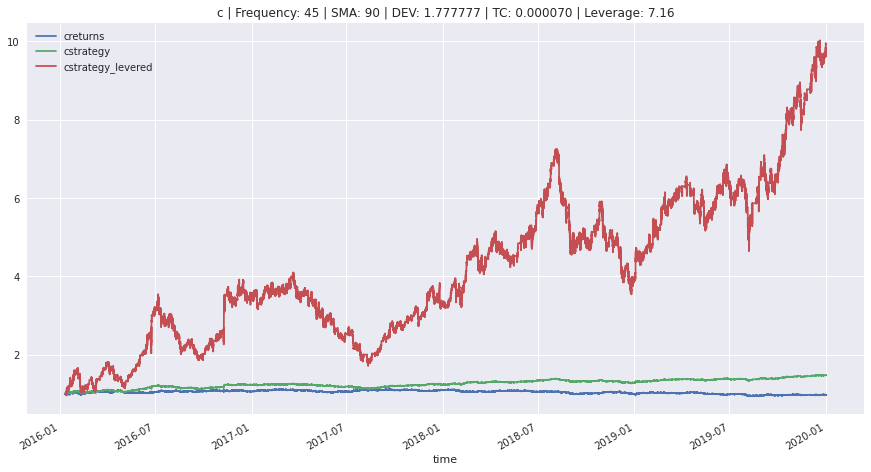

In [3]:
#tester.optimize_strategy((5,400,40),(10,150,40),(1,2,10), metric = "Multiple") #quick
tester.test_strategy(freq=45, sma=90, dev = 1.777777)
half_kelly = (tester.calculate_kelly_criterion(tester.results.strategy))/2
tester.add_leverage(leverage = half_kelly, sl = -0.35)
tester.plot_results(leverage = True)

## Test optimal strategy on forward data

SIMPLE CONTRARIAN STRATEGY | INSTRUMENT = c | FREQ = 45 | SMA = 90 | DEV = 1.777777
----------------------------------------------------------------------------------------------------


PERFORMANCE MEASURES:


Multiple (Strategy):         1.020296
Multiple (Buy-and-Hold):     1.031387
--------------------------------------
Out-/Underperformance:       -0.011091


CAGR:                        0.010231
Annualized Mean:             0.010177
Annualized Std:              0.082357
Sharpe Ratio:                0.123570
Sortino Ratio:               0.175884
Maximum Drawdown:            0.092125
Calmar Ratio:                0.111056
Max Drawdown Duration:       510 Days
Kelly Criterion:             2.000134


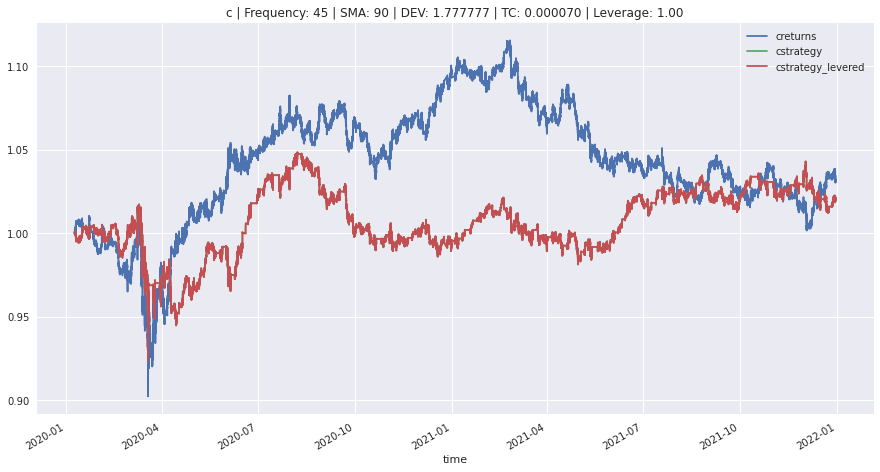

In [5]:
#best = tester.results_overview.nlargest(1,columns='Performance')

forward = BBBacktester("AUD_CAD_2016_2021.csv", "c", "2020-01-01", "2021-12-31", spread*pips/2) #mult by 2 for a 'round trip', multiply by pips
#forward.test_strategy(freq=best.Freq.values[0], sma=best.Sma.values[0], dev = best.Dev.values[0])
forward.test_strategy(freq=45, sma=90, dev = 1.777777)
fw_half_kelly = (forward.calculate_kelly_criterion(forward.results.strategy))/2
forward.add_leverage(leverage = fw_half_kelly, sl = -0.35)
forward.plot_results(leverage=True)